The functions below generate values for the models referred to in Figure 1 - Supplemental Figure 2.

In [14]:
import random
import numpy as np

def run_bias_once(total_n, pol_number, average):
    
    diff_respond = [random.uniform((0),(45)) for r in range(pol_number)]
    n = total_n - pol_number
    if n > 0:
        diff_no_respond = generate_average(n, average)
        diff = diff_respond + diff_no_respond
    elif n == 0:
        diff = diff_respond
    rads = [x*(np.pi/180) for x in diff]
    
    return rads

def generate_average(n, expected_avg, a=46, b=180):
    
    while True:
        l = [random.randint(a, b) for i in range(n)]
        avg = reduce(lambda x, y: x + y, l) / len(l)
        if avg == expected_avg:
            return l
        
def simulation(x, total_n, pol_number, average):
    
    values = []
    for i in range(x):
        theta = run_bias_once(total_n, pol_number, average)
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol

pol_eff = []
for i in range(11):
    pol = simulation(1000,10,i,102)
    pol_eff.append(pol)

non_bias_pol_eff = []
for i in range(11):
    pol_non_bias = simulation(1000,10,i,90)
    non_bias_pol_eff.append(pol_non_bias)
    
print 'Done'

Done


The code below shows the output of the functions above in a graphical representation. This graph is shown in Figure 1 - Supplemental Figure 2D.

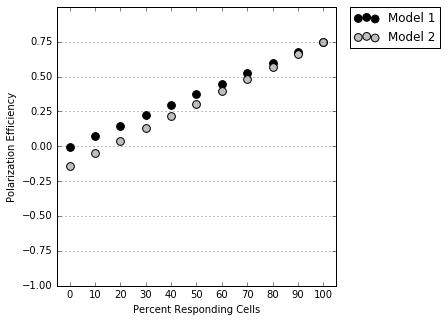

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig_size = [5,5]
plt.rcParams["figure.figsize"] = fig_size

xs = range(0,110,10)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xs, non_bias_pol_eff, s=60, c='k', label="Model 1")
ax1.scatter(xs, pol_eff, s=60, c='#bebebe', label="Model 2")
plt.xlim(-5,105)
plt.ylim(-1,1)
plt.ylabel("Polarization Efficiency")
plt.xlabel("Percent Responding Cells")

ax1.set_yticks(np.arange(-1.0,1,0.25))
ax1.set_xticks(np.arange(0,105,10))

plt.rc('grid', linestyle=":", color='k')
ax1.yaxis.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()